# Exercise set 6

> **The first goal** of this exercise is to analyze a fractional factorial design and use
> confounding, defining contrast(s), generators and the resolution.
>
> In connection with experimental design, we have seen two approaches for checking if
> determined effects are important or not. These two approaches are based on creating
> a probability plot and performing ANOVA. **The second goal** of this exercise is to
> use these two approaches in practice.

# Exercise 6.1

You have recently started a new job as the lead
experimental chemist in a company that makes chocolate bars.
A new, and supposedly tasty, chocolate is being developed, and the
main ingredients that you can vary are: 


*  The amount of cocoa ($A$).

*  The number of pecan nuts ($B$).

*  The amount of caramel ($C$).

*  The amount of milk powder ($D$).

*  The amount of sugar ($E$).

*  The amount of vanilla ($F$).

You are tasked with carrying out a maximum of $16$ experiments (limited due to cost
and time constraints) in which the best mixture of the main ingredients ($A$–$F$)
is found. ("Best" is here determined by a tasting panel made up of $30$ people.)
For this task you decide on making a two-level fractional factorial design.


**(a)**  How many experiments would you have to carry out
if you were to perform a full factorial design?

In [1]:
print(f"Number of experiments for full factorial design is {2**6}")

Number of experiments for full factorial design is 64


**Your answer to question 6.1(a):** 64

**(b)**  As stated, you can only carry out $16$ experiments. 
Explain what confounding is and why the set up with
$16$ experiments will lead to confounding.

**Your answer to question 6.1(b):**

When we carry out a full factorial design, we do enough
experiments so that we can determine the effect of all
factors. When we
do a fractional factorial design, we do too few experiments
to uniquely determine all the effects. When we estimate effects,
we then find that the expressions for some of the effects are
identical and there is no way that we can distinguish between them.
The extreme case would be if we only carried out one experiment,
then we would not have any information on how the different
variables influences out measured quantity.

In the present case, we need $64$ experiments (see answer at **(a)**)
but we can only do $16$. We therefore know that some of our factors
will be confounded with each other.

Luckily, we have some choice and we can, for instance, make it so
that the main effects are confounded with higher-order interactions.
This is useful as we often can neglect higher-order interactions
compared to the main effects.

**(c)**  After talking with the chocolate design team, you
decide on the following generators:

*  $E = ABC$.

*  $F = BCD$.

What is a defining contrast, and what are the
defining contrasts in this case?

**Your answer to question 6.1(c):**

A defining contrast is a
relation that can be used to deduce
what variables are confounded.
In this case, we decided on two generators which can be used
to generate the defining contrasts,
*  $E = ABC \implies E^2 = 1 = ABCE$.
*  $F = BCD \implies F^2 = 1 = BCDF$.

In addition, we have that,
\begin{equation*}
1 \times 1 = 1 = ABCE \times BCDF = ADEF.
\end{equation*}

Thus, we have $3$ defining constrasts here:
* $1 = ABCE$.
* $1 = BCDF$.
* $1 = ADEF$.

**(d)**  Are any of the main effects confounded with $2$-factor
interactions in this case?

**Your answer to question 6.1(d):**

Here, we have made the choices $E = ABC$ and $F = BCD$.
This means that we confound the two main effects $E$ and $F$
with $3$-factor interactions. Let check the confounding in
full detail for the main effects (see also the summary in
Table 3):

* For $A$ we have:

    * $A = A \times 1 = A \times ABCE = BCE$,
    * $A = A \times 1 = A \times BCDF = ABCDF$,
    * $A = A \times 1 = A \times ADEF = DEF$,
  
  and we see that $A$ is confounded with $BCE$, $DEF$ and
  $ABCDF$.


* For $B$ we have:
  
  * $B = B \times 1 = B \times ABCE = ACE$,
  * $B = B \times 1 = B \times BCDF = CDF$,
  * $B = B \times 1 = B \times ADEF = ABDEF$,
  
  and we see that $B$ is confounded with $ACE$, $CDF$ and
  $ABDEF$.


* For $C$ we have:
  
  * $C = C \times 1 = C \times ABCE = ABE$,
  * $C = C \times 1 = C \times BCDF = BDF$,
  * $C = C \times 1 = C \times ADEF = ACDEF$,
  
  and we see that $C$ is confounded with $ABE$, $BDF$ and
  $ACDEF$.


* For $D$ we have:
  
  * $D = D \times 1 = D \times ABCE = ABCDE$,
  * $D = D \times 1 = D \times BCDF = BCF$,
  * $D = D \times 1 = D \times ADEF = AEF$,
  
  and we see that $D$ is confounded with $AEF$, $BCF$ and
  $ABCDE$.


* For $E$ we have:
  * $E = E \times 1 = E \times ABCE = ABC$,
  * $E = E \times 1 = E \times BCDF = BCDEF$,
  * $E = E \times 1 = E \times ADEF = ADF$,
  
  and we see that $E$ is confounded with $ABC$, $ADF$ and
  $BCDEF$.


* For $F$ we have:
  
  * $F = F \times 1 = F \times ABCE = ABCEF$,
  * $F = F \times 1 = F \times BCDF = BCD$,
  * $F = F \times 1 = F \times ADEF = ADE$,
  
  and we see that $F$ is confounded with $ADE$, $BCD$ and
  $ABCEF$.
  

Based on this, we conclude that **none** of the main effects are
confounded with $2$-factor interactions.

|**Main effect**  | **Confounded with** |
|:---:|:---:|
|$A$ | $BCE$, $DEF$ & $ABCDF$ |
|$B$ | $ACE$, $CDF$ & $ABDEF$ |
|$C$ | $ABE$, $BDF$ & $ACDEF$ |
|$D$ | $AEF$, $BCF$ & $ABCDE$ |
|$E$ | $ABC$, $ADF$ & $BCDEF$ |
|$F$ | $ADE$, $BCD$ & $ABCEF$ |

| |
|:--|
|**Table 3:** *Confounding between variables in the $2^{6-2}_\text{IV}$ fractional factorial design.*|

**(e)**  What is the resolution for this design? Write out
the short-hand representation of this design on the
form $2^{N-p}_R$, where $N$ is the number of factors,
$p$ is the number of generators, and $R$ the resolution.

**Your answer to question 6.1(e):**

The resolution is identical to the length of the shortest
defining contrast. From point **(c)** we see that
the shortest defining contrast has a length of $4$. This means
that our design is a $2^{6-2}_\text{IV}$ fractional factorial design.

We also know that given the resolution $R$, a $p$-order factor will
be confounded with other factors of order $R-p$ or higher. For the
main effects, $p=1$, and we have then that these effects will be
confounded with factors of order $R-p = 4 - 1 = 3$ or higher. This
is exactly what we found in point **(d)**. Thus, we could
have answered the previous question without all the calculations just
by considering the resolution.

**(f)**  Construct the design matrix for the current design, but show
only the columns for the main effects.

In [2]:
import itertools as itt
a = [0, 1]
b = [0, 1]
c = [0, 1]
d = [0, 1]

print("a  b  c  d  e  f")

for ai, bi, ci, di in itt.product(a,b,c,d):

    # E = abc
    ei = ai == (bi == ci) # Assign the truth of ai == (bi == ci) to ei, not the first single equal

    # F = bcd
    fi = bi == (ci == di)

    out = ["+" if i else "-" for i in [ai, bi, ci, di, ei, fi]]
    print("  ".join(out))

a  b  c  d  e  f
-  -  -  -  -  -
-  -  -  +  -  +
-  -  +  -  +  +
-  -  +  +  +  -
-  +  -  -  +  +
-  +  -  +  +  -
-  +  +  -  -  -
-  +  +  +  -  +
+  -  -  -  +  -
+  -  -  +  +  +
+  -  +  -  -  +
+  -  +  +  -  -
+  +  -  -  -  +
+  +  -  +  -  -
+  +  +  -  +  -
+  +  +  +  +  +


**Your answer to question 6.1(f):**

The design matrix for the $6$ main effects
is given in the prints above and the table below.

|$A$  | $B$ | $C$ | $D$ | $E$ | $F$ |
|:---:|:---:|:---:|:---:|:---:|:---:|
|$-$ | $-$ | $-$ | $-$ | $-$ | $-$ |
|$-$ | $-$ | $-$ | $+$ | $-$ | $+$ |
|$-$ | $-$ | $+$ | $-$ | $+$ | $+$ |
|$-$ | $-$ | $+$ | $+$ | $+$ | $-$ |
|$-$ | $+$ | $-$ | $-$ | $+$ | $+$ |
|$-$ | $+$ | $-$ | $+$ | $+$ | $-$ |
|$-$ | $+$ | $+$ | $-$ | $-$ | $-$ |
|$-$ | $+$ | $+$ | $+$ | $-$ | $+$ |
|$+$ | $-$ | $-$ | $-$ | $+$ | $-$ |
|$+$ | $-$ | $-$ | $+$ | $+$ | $+$ |
|$+$ | $-$ | $+$ | $-$ | $-$ | $+$ |
|$+$ | $-$ | $+$ | $+$ | $-$ | $-$ |
|$+$ | $+$ | $-$ | $-$ | $-$ | $+$ |
|$+$ | $+$ | $-$ | $+$ | $-$ | $-$ |
|$+$ | $+$ | $+$ | $-$ | $+$ | $-$ |
|$+$ | $+$ | $+$ | $+$ | $+$ | $+$ |

| |
|:--|
|**Table 4:** *Experimental design matrix for the $2^{6-2}_\text{IV}$ fractional factorial design.*|

**(g)**  Another member of your team suggests doing just $8$ experiments
as this will cut time and cost.
Do you think this is a good idea? Why/why not? What would
the design matrix look like in this case?

In [3]:
a = [0, 1]
b = [0, 1]
c = [0, 1]

print("a  b  c  d  e  f")

for ai, bi, ci in itt.product(a,b,c):

    # D = AB
    di = ai == bi

    # E = AC
    ei = ai == ci

    # F = bc
    fi = bi == ci

    out = ["+" if i else "-" for i in [ai, bi, ci, di, ei, fi]]
    print("  ".join(out))

a  b  c  d  e  f
-  -  -  +  +  +
-  -  +  +  -  -
-  +  -  -  +  -
-  +  +  -  -  +
+  -  -  -  -  +
+  -  +  -  +  -
+  +  -  +  -  -
+  +  +  +  +  +


**Your answer to question 6.1(g):**

With $8$ experiments, we get even less information and we
expect the confounding to change. This is a $2^{6-3}$
fractional design. In this case we can determine $3$ of the
main effects fully ($2^3 = 2^{6-3}$) and for the remaining $3$
we have to select generators. Let us say that we select $A$,
$B$ and $C$ as the main effects we determine fully. Then,
we have to choose generators for $D$, $E$ and $F$ by combining
$A$, $B$ and $C$.

We can make $3$ combinations using $2$ of
the three variables (the general formula
for the number of combinations when we have $n$ objects and select $r$ of them is
$n!/(r!(n-r)!)$), for instance,

* (i)  $D = AB$,

* (ii)  $E = AC$,

* (iii)  $F = BC$.


The defining contrasts will then be,

* (i)  $D = AB \implies D^2 = 1 = ABD$,

* (ii)  $E = AC \implies E^2 = 1 = ACE$,

* (iii)  $F = BC \implies F^2 = 1 = BCF$,

* (iv)  $1 = 1 \times 1 = ABD \times ACE = BCDE$,

* (v)  $1 = 1 \times 1 = ABD \times BCF = ACDF$,

* (vi)  $1 = 1 \times 1 = ACE \times BCF = ACDF$,

* (vii)  $1 = 1 \times 1 \times 1 = ABD \times ACE \times BCF = DEF$.


We see from this that the shortest defining contrast has a length
of $3$ (i.e. the resolution is $R=3$) and we have
a $2^{6-3}_{\text{III}}$ fractional factorial design.
We know then that the main effects ($p=1$) will be
confounded with factors of order $R-p = 3 - 1 = 2$ or higher.
So we have that our main effects will be confounded with $2$-factor
interactions.

In general, we want our main effects to not be confounded with
interactions lower than $3$-factor interactions. We would then
advise against doing only $8$ experiments, and keep to the
original plan with $16$ experiments to be able to better
assess the main effects.

The design matrix for our selection of generators is
given in the table below and the print above. Note that you might
get different design matrices, depending on your choice of
generators.

|$A$  | $B$ | $C$ | $D$ | $E$ | $F$ |
|:---:|:---:|:---:|:---:|:---:|:---:|
|$-$ | $-$ | $-$ | $+$ | $+$ | $+$ |
|$-$ | $-$ | $+$ | $+$ | $-$ | $-$ |
|$-$ | $+$ | $-$ | $-$ | $+$ | $-$ |
|$-$ | $+$ | $+$ | $-$ | $-$ | $+$ |
|$+$ | $-$ | $-$ | $-$ | $-$ | $+$ |
|$+$ | $-$ | $+$ | $-$ | $+$ | $-$ |
|$+$ | $+$ | $-$ | $+$ | $-$ | $-$ |
|$+$ | $+$ | $+$ | $+$ | $+$ | $+$ |

| |
|:---|
|**Table 5:** *Experimental design matrix for the $2^{6-3}_\text{III}$ fractional factorial design.*|

## Exercise 6.2

After running a set of experiments, you determine the effects
given in Table 1 for $4$ factors: A, B, C, and D.
Use a normal probability plot to identify the important effects among
the ones listed in this table. (Note: These numbers were also used in lecture $6$.)

|**Factor** | **Effect** |
|:---------:|:----------:|
|A          |  -8.00     |
|B          |  24.00     |
|C          |  -2.25     |
|D          |  -5.50     |
|AB         |   1.00     |
|AC         |   0.75     |
|AD         |   0.00     |
|BC         |  -1.25     |
|BD         |   4.50     |
|CD         |  -0.25     |
|ABC        |  -0.75     |
|ABD        |   0.50     |
|ACD        |  -0.25     |
|BCD        |  -0.75     |
|ABCD       |  -0.25     |

| |
|---|
|**Table 1:** *Effects determined in a set of experiments.*|

<IPython.core.display.Javascript object>


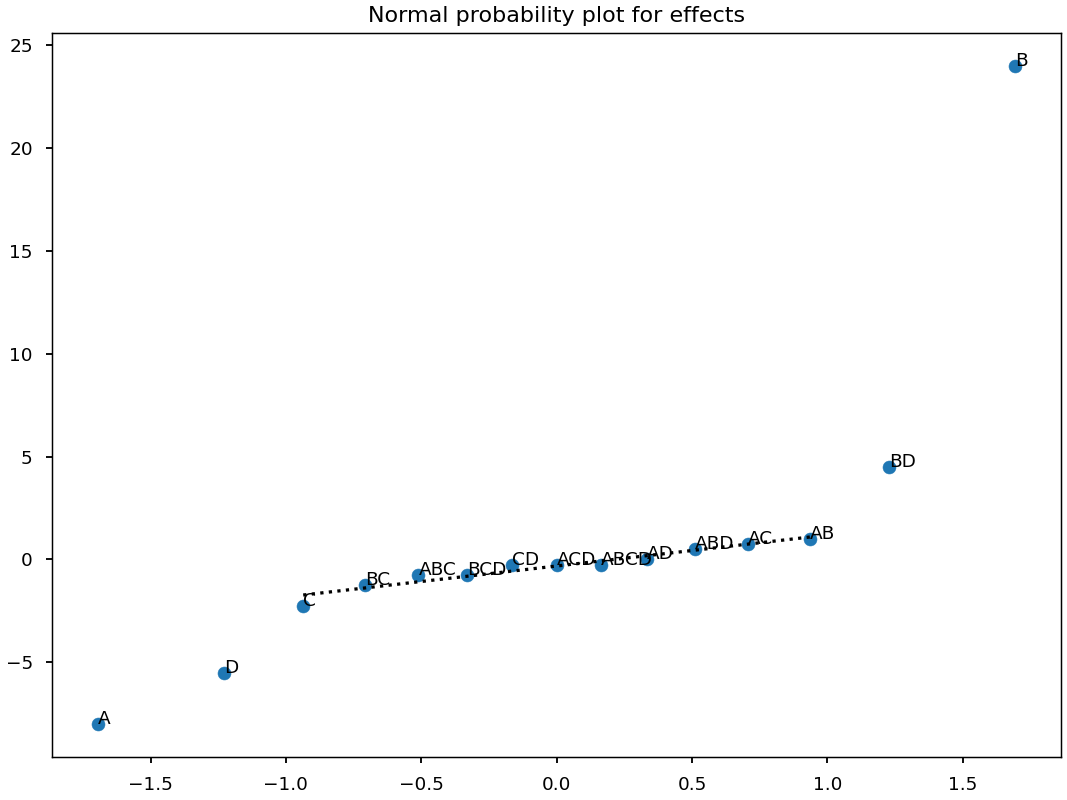

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
%matplotlib notebook
plt.style.use('seaborn-notebook')

effect = [-8, 24, -2.25, -5.5, 1, 0.75, 0.0, -1.25, 4.5, -0.25, -0.75, 0.5, -0.25, -0.75, -0.25]
factor = ['A', 'B', 'C', 'D', 'AB', 'AC', 'AD', 'BC', 'BD', 'CD', 'ABC', 'ABD', 'ACD', 'BCD', 'ABCD']

df = pd.DataFrame(data=effect, index=factor)
df = df.sort_values(0)

fig, axs = plt.subplots(constrained_layout=True, figsize=(8, 6))
ax = axs

# Sort the dataframe based on values of column 0
data = df
n = len(data)
# first mi:
m1 = [1-.5**(1/n)]
# mi in between:
ms =  [(i-0.3175)/(n+0.365) for i in range(2, n)]  # n is not included here
# last mi:
ml = [0.5**(1/n)]

mi = m1+ms+ml
xi = norm.ppf(mi)  # convert from uniform to normal distribution

# Plot the points:
ax.scatter(xi, data)


# add a trendline
param = np.polyfit(xi[2:-2], data[2:-2], 1)
xpoints = np.array([xi[2], xi[-3]])
y_hat = np.polyval(param, xpoints)
ax.plot(xpoints, y_hat, ls=':', c='k')

ax.set_title("Normal probability plot for effects")

#Annotate the points
for i, txt in enumerate(data.index):
    ax.annotate(txt, (xi[i], data.iloc[i]))


**Answer to question 6.2:** The normal probability plot of the effects is given in the figure above. We see here that 4 factors deviate significantly from the other effects, and a straight line through these points: A, D, BD, and B. We thus conclude that these 4 factors are the important factors in this case.

**Exercise 6.3**

From a $2^2$ factorial experiment replicated three times you have obtained
the data given in Table 3. We use here a short-hand notation
for the $4$ possible combinations of the variables: $(1)$, $a$, $b$, and $ab$.
In this notation $(1)$ is the experiment where all factors were at their low levels. For the
other cases, the absence of a letter means that the corresponding factor was at a low level, and
the presence of a letter means that the corresponding factor was at a high level (e.g. "$a$" is the
same as saying that factor A was at the high level and B at the low level). 


|**Experiment** | **Replicate 1** | **Replicate 2** | **Replicate 2** |
|:---:|:---:|:---:|:---:|
|$(1)$ | $9$  | $10$ | $11$ |
|$a$   | $30$ | $31$ | $29$ |
|$b$   | $19$ | $20$ | $21$ |
|$ab$  | $5$  | $6$  | $4$  |

| |
|---|
|**Table 2:** *Results from a $2^2$ factorial experiment, repeated $3$ times.*|

**(a)**  Calculate the effects (A, B, and AB).

In [5]:
data = {(0, 0): np.array([9, 10, 11]),
        (1, 0): np.array([30, 31, 29]),
        (0, 1): np.array([19, 20, 21]),
        (1, 1): np.array([5, 6, 4]),}
data_mean = {key: value.mean() for key,value in data.items()}

var = 2**(2-1)

A = sum([value if not key[0] else -1*value for key, value in data_mean.items()])/var
B = sum([value if not key[1] else -1*value for key, value in data_mean.items()])/var
AB = sum([value if key[0]==key[1] else -1*value for key, value in data_mean.items()])/var

print("Effect  A: {}".format(A))
print("Effect  B: {}".format(B))
print("Effect AB: {}".format(AB))

Effect  A: -2.5
Effect  B: 7.5
Effect AB: -17.5


**(b)**  Use ANOVA to investigate which effects are important in this case.
Use a significance level of $\alpha = 0.01$. For
a significance level of $\alpha = 0.01$, the relevant critical
$f$-value is $f_{\alpha=0.01}(1, 8) = 11.259$ with $1$ and $8$ degrees
of freedom. (Note: These numbers in Table 2
are the same as for the example on
page $96$ in the textbook.)

In [6]:
from itertools import chain, combinations
from functools import reduce
import operator
import scipy

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


k = 3  # 3 repeated experiments
N = 2  # 2 factors.
data = [
    ['(1)', 9, 10, 11],
    ['a', 30, 31, 29],
    ['b', 19, 20, 21],
    ['ab', 5, 6, 4],
]

signs = {}
for key in ('a', 'b'):
    signs[key] = np.array([1 if key in row[0] else -1 for row in data])

# Obtain contrasts:
contrasts = {}
for factors in powerset(('a', 'b')):
    if not factors:
        continue
    factor_name = ''.join(factors)
    factor_sign = reduce(operator.mul, [signs[i] for i in factors])
    contrasts[factor_name] = 0
    for sign, experiment in zip(factor_sign, data):
        contrasts[factor_name] += sign * sum(experiment[1:])
print('Contrasts:', contrasts)

effects = {}
# Calculate effects:
for factor, contrast in contrasts.items():
    effects[factor] = contrast / (k * 2**(N - 1))
print('Effects:', effects)

# Calculate sum of squares:
sum_squares = {}
for factor, contrast in contrasts.items():
    sum_squares[factor] = contrast*contrast / (k * 2**N)
print('Sum of squares:', sum_squares)

# Calculate total sum of squares:
data_values = np.array([i[1:] for i in data])
mean = data_values.mean()
SST = np.sum((data_values - mean)**2)
print('SST =', SST)

SSE = SST - sum([val for _, val in sum_squares.items()])
print('SSE =', SSE)
df_sse = 2**2 * (k - 1)
print('Degrees of freedom SSE:', df_sse)
sigma = SSE / df_sse

# Calculate f-values:
print()
for factor, ssi in sum_squares.items():
    fval = ssi / sigma
    pval = 1 - scipy.stats.f.cdf(fval, 1, df_sse)
    print(f'ANOVA for: {factor}')
    print(f'\tf = {fval}')
    print(f'\tp = {pval}')

# Print out some critical f-values at different significance levels:
print('\nCritical f-values:')
for alpha in (0.001, 0.01, 0.05, 0.1):
    f_critical = scipy.stats.f.ppf(1 - alpha, 1, df_sse)
    print(f'\tAt alpha {alpha:5.3f}: f-critical = {f_critical:6.3f}')

Contrasts: {'a': 15, 'b': -45, 'ab': -105}
Effects: {'a': 2.5, 'b': -7.5, 'ab': -17.5}
Sum of squares: {'a': 18.75, 'b': 168.75, 'ab': 918.75}
SST = 1114.25
SSE = 8.0
Degrees of freedom SSE: 8

ANOVA for: a
	f = 18.75
	p = 0.0025115519065117553
ANOVA for: b
	f = 168.75
	p = 1.168956877184435e-06
ANOVA for: ab
	f = 918.75
	p = 1.5236063521939514e-09

Critical f-values:
	At alpha 0.001: f-critical = 25.415
	At alpha 0.010: f-critical = 11.259
	At alpha 0.050: f-critical =  5.318
	At alpha 0.100: f-critical =  3.458


**Answer to question 6.3(b):** Comparing the calculated $f$-values with the given critical value
(11.259) we see that all the
effects are significant at a 0.01 significance level.

This is also reflected in the calculated p-values. All of these are small, which means that if
the effects are not significant, then the probability of observing what we have observed is
small. Since this probability is small, we thus reject the null hypothesis (the effects are not
significant) and conclude that *all these effects are significant*.